In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# assign heading to the name of column
heading = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']
adult_data = pd.read_csv('adult.data', names = heading)
adult_test = pd.read_csv('adult.test', names = heading, skiprows = 1)

In [3]:
# adult_data = adult_data.applymap(lambda x : str(x).strip())
# adult_test = adult_test.applymap(lambda x : str(x).strip())

In [4]:
# adult_data[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']] = adult_data[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']].astype(int)
# adult_test[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']] = adult_test[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']].astype(int)

In [5]:
adult_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
adult_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [8]:
adult_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16281 non-null  object
 14  salary          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [9]:
# drop rows containing ' ?'
adult_data = adult_data.replace(' ?', np.nan).dropna()
adult_test = adult_test.replace(' ?', np.nan).dropna()

In [10]:
adult_data.shape

(30162, 15)

In [11]:
adult_test.shape

(15060, 15)

In [12]:
# Change native country not US to Non_US  
adult_data['native_country'].loc[adult_data['native_country'] != ' United-States'] = 'Non_US'
adult_test['native_country'].loc[adult_test['native_country'] != ' United-States'] = 'Non_US'
adult_data['native_country'].unique()

array([' United-States', 'Non_US'], dtype=object)

In [13]:
# Assign another column Non_US to 0, US to 1
adult_data['country'] = adult_data['native_country'].map({'Non_US': 0, ' United-States' : 1})
adult_test['country'] = adult_test['native_country'].map({'Non_US': 0, ' United-States' : 1})

In [14]:
adult_data['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [15]:
adult_test['salary'].unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [16]:
# result column for y
adult_data['result'] = adult_data['salary'].map({' <=50K': 0, ' >50K' : 1})
adult_test['result'] = adult_test['salary'].map({' <=50K.': 0, ' >50K.' : 1})

In [17]:
# Category to ordinal
# from sklearn.preprocessing import LabelEncoder
# from category_encoders import OneHotEncoder
# le = LabelEncoder()
# category = ['workclass', 'occupation', 'race', 'sex']
# encoder = OneHotEncoder(cols = category, handle_unknown='indicator', handle_missing='indicator', use_cat_names = True).fit(train_set,train_y)
# for i in category:
    # adult_data[i]=le.fit_transform(adult_data[i])
    # adult_test[i]=le.fit_transform(adult_test[i])
    # onehotencoder = OneHotEncoder()
    # adult_data[i] = onehotencoder.fit_transform(adult_data[i]).toarray().reshape(-1, 1)
    # adult_test[i] = onehotencoder.fit_transform(adult_test[i]).toarray().reshape(-1, 1)

In [18]:
adult_data.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary,country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Non_US,<=50K,0,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Non_US,<=50K,0,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1,1


In [19]:
# drop unused columns
l = ['education', 'native_country', 'salary', 'relationship']
training = adult_data.drop(l, axis = 1)
testing = adult_test.drop(l, axis = 1)

In [20]:
from category_encoders import OneHotEncoder

# X for training and testing set
X_train_org = training.drop('result', axis = 1)
X_test_org = testing.drop('result', axis = 1)

# y for training and testing set
y_train = training['result']
y_test = testing['result']

# tranform category to vector with 1 and 0
category = ['workclass', 'occupation', 'race', 'sex', 'marital_status']
encoder = OneHotEncoder(cols = category, handle_unknown = 'indicator', handle_missing = 'indicator', use_cat_names = True).fit(X_train_org, y_train)

X_train_org = encoder.transform(X_train_org)
X_test_org = encoder.transform(X_test_org)

X = pd.concat([X_train_org, X_test_org])

In [21]:
X_train_org.head(10)

,age,workclass_ State-gov,workclass_ Self-emp-not-inc,workclass_ Private,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Self-emp-inc,workclass_ Without-pay,workclass_nan,workclass_-1,...,race_nan,race_-1,sex_ Male,sex_ Female,sex_nan,sex_-1,capital_gain,capital_loss,hours_per_week,country
0,39,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2174,0,40,1
1,50,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,13,1
2,38,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,40,1
3,53,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,40,1
4,28,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,40,0
5,37,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,40,1
6,49,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,16,0
7,52,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,45,1
8,31,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,14084,0,50,1
9,42,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,5178,0,40,1


In [22]:
# Data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [23]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', solver='liblinear', C = c, max_iter = 1200)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, max_iter= 1200)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

Accuracy of training set is around 84.8%

Accuracy of testing set is around 84.6%

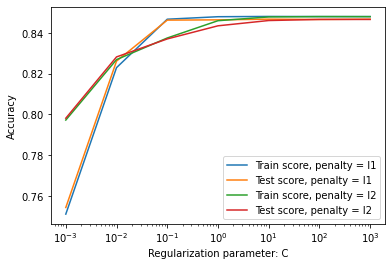

In [24]:
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [25]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 4)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.840
Accuracy on test set: 0.839


In [26]:
from sklearn.metrics import confusion_matrix
pred_dtree = dtree.predict(X_test)
confusion = confusion_matrix(y_test, pred_dtree)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[10771   589]
 [ 1834  1866]]


In [27]:
# PCA

from sklearn.decomposition import PCA

# create model
pca = PCA(n_components= 0.95)

# train pca model
pca.fit(X_train)

# transforming X_train and X_test
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', solver='liblinear', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train_reduced, y_train)
    log_l2.fit(X_train_reduced, y_train)
    train_score_l1.append(log_l1.score(X_train_reduced, y_train))
    train_score_l2.append(log_l2.score(X_train_reduced, y_train))
    test_score_l1.append(log_l1.score(X_test_reduced, y_test))
    test_score_l2.append(log_l2.score(X_test_reduced, y_test))

After PCA

Accuracy of training set is around 82.2%

Accuracy of testing set is around 82.2%

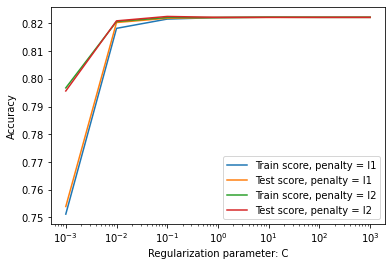

In [29]:
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [30]:
# Decision Tree after PCA
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 4)
dtree.fit(X_train_reduced, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_reduced, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_reduced, y_test)))

Accuracy on training set: 0.820
Accuracy on test set: 0.818


In [31]:
# Deep Learning

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [32]:
# step 1: build the model
model = Sequential()
model.add(Dense(10, input_dim = 52, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [33]:
# step 2: compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [34]:
# step 3: train the model
model.fit(X_train, y_train, batch_size = 256, epochs = 32)

Epoch 1/32
118/118 [==============================] - 0s 778us/step - loss: 0.5362 - accuracy: 0.7299
Epoch 2/32
118/118 [==============================] - 0s 787us/step - loss: 0.4243 - accuracy: 0.7920
Epoch 3/32
118/118 [==============================] - 0s 937us/step - loss: 0.3912 - accuracy: 0.8165
Epoch 4/32
118/118 [==============================] - 0s 980us/step - loss: 0.3794 - accuracy: 0.8231
Epoch 5/32
118/118 [==============================] - 0s 894us/step - loss: 0.3730 - accuracy: 0.8263
Epoch 6/32
118/118 [==============================] - 0s 923us/step - loss: 0.3682 - accuracy: 0.8265
Epoch 7/32
118/118 [==============================] - 0s 873us/step - loss: 0.3638 - accuracy: 0.8291
Epoch 8/32
118/118 [==============================] - 0s 896us/step - loss: 0.3600 - accuracy: 0.8314
Epoch 9/32
118/118 [==============================] - 0s 842us/step - loss: 0.3564 - accuracy: 0.8325
Epoch 10/32
118/118 [==============================] - 0s 818us/step - loss: 0.353

after 32 epochs, the accuracy of training set is around 84.8%

In [35]:
# Step 4: Model evaluation

loss_and_metrics = model.evaluate(X_test, y_test)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

471/471 [==============================] - 0s 659us/step - loss: 0.3278 - accuracy: 0.8482
Test Loss 0.3277556002140045
Test Accuracy 0.8482071757316589


accuracy of testing set is around 84.7%

In [36]:
# deep learning with hidden layer

# step 1: build the model
model1 = Sequential()
# input leyer
model1.add(Dense(10, input_dim = 52, activation = 'relu'))
# hidden layer
model1.add(Dense(5, activation = 'relu'))
# output layer
model1.add(Dense(1, activation = 'sigmoid'))

# step 2: build the computational graph - compile
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

# step 3: train the model
model1.fit(X_train, y_train, batch_size = 256, epochs = 32)

Epoch 1/32
118/118 [==============================] - 0s 1ms/step - loss: 0.6134 - accuracy: 0.6754
Epoch 2/32
118/118 [==============================] - 0s 935us/step - loss: 0.4585 - accuracy: 0.7621
Epoch 3/32
118/118 [==============================] - 0s 955us/step - loss: 0.3940 - accuracy: 0.8181
Epoch 4/32
118/118 [==============================] - 0s 910us/step - loss: 0.3749 - accuracy: 0.8257
Epoch 5/32
118/118 [==============================] - 0s 966us/step - loss: 0.3655 - accuracy: 0.8282
Epoch 6/32
118/118 [==============================] - 0s 1ms/step - loss: 0.3591 - accuracy: 0.8321
Epoch 7/32
118/118 [==============================] - 0s 1ms/step - loss: 0.3527 - accuracy: 0.8353
Epoch 8/32
118/118 [==============================] - 0s 980us/step - loss: 0.3472 - accuracy: 0.8367
Epoch 9/32
118/118 [==============================] - 0s 949us/step - loss: 0.3426 - accuracy: 0.8388
Epoch 10/32
118/118 [==============================] - 0s 1ms/step - loss: 0.3382 - accu

after 32 epochs, the accuracy of training set is around 85.1%

In [37]:
# Step 4: Model evaluation
loss_and_metrics = model1.evaluate(X_test, y_test)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

471/471 [==============================] - 0s 659us/step - loss: 0.3248 - accuracy: 0.8487
Test Loss 0.3248286247253418
Test Accuracy 0.8487383723258972


accuracy of testing set is around 84.8%